# Exploratory Data Analysis
---

***Para facilitar la lectura y seguimiento de este archivo, las llamadas a los endpoints (y algunas pasos de conversión de datos y separación de columnas), están desarrollados en endpoints.py, que es utilizado a modo de librería de funciones***

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from endpoints import *
from wordcloud import WordCloud
from pprint import pprint

import warnings
warnings.filterwarnings('ignore')

## 1. Obtenemos las ids de las monedas a utilizar, llamando el endpoint que lista a la totalidad
---

https://api.coingecko.com/api/v3/coins/list

La moneda bitcoin será utilizada para algunas comparaciones, a modo de patrón.

In [2]:
# Llamado al endpoint
df_monedas = get_coins_list()

# Listado de monedas seleccionadas
crypto_names = [
    "Bitcoin",
    "Monero",
    "Zcash",
    "Dash",
    "Horizen",
    "Verge",
    "Grin",
    "Pirate Chain",
    "Decred",
    "Dero",
    "Secret"
]

try:
    # Filtramos
    df_monedas = df_monedas[df_monedas['name'].isin(crypto_names)]

    # Listamos las IDs
    crypto_ids = df_monedas['id'].tolist()
except:
    print(df_monedas)

In [3]:
crypto_ids

['bitcoin',
 'dash',
 'decred',
 'dero',
 'grin',
 'monero',
 'pirate-chain',
 'secret',
 'verge',
 'zcash',
 'zencash']

### Dada la utilización de los ids para el llamado a los endpoints, y el orden de los registros brindados por CoinGecko, no vamos a observar filas duplicadas a lo largo de este análisis.

## 2. El endpoint "Markets" provee información general de las monedas seleccionadas
---

https://api.coingecko.com/api/v3/coins/markets?vs_currency=USD&ids={}&order=market_cap_desc&per_page=100&page=1&sparkline=false&locale=en

In [4]:
# Configuramos para expandir los df
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Llamamos el Markets endpoint con el listado de monedas seleccionadas 

In [5]:
df_markets = get_coins_markets(crypto_ids)

In [6]:
df_markets

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,29282.000000,571147259042,1,6.164026e+11,11642393959,29653.000000,29263.000000,-284.159235,-0.96109,-4.294164e+09,-0.74624,1.945821e+07,2.100000e+07,21000000.0,69045.000000,-57.48484,2021-11-10 14:24:11.849,67.810000,43189.96638,2013-07-06 00:00:00.000,NaN,2023-08-15 15:59:41.875
1,monero,xmr,Monero,https://assets.coingecko.com/coins/images/69/l...,157.200000,2853286580,26,NaN,73150761,159.760000,156.840000,-2.192762,-1.37572,-4.087589e+07,-1.41236,1.814782e+07,NaN,NaN,542.330000,-71.02088,2018-01-09 00:00:00.000,0.216177,72600.34626,2015-01-14 00:00:00.000,NaN,2023-08-15 15:59:44.780
2,dash,dash,Dash,https://assets.coingecko.com/coins/images/19/l...,31.340000,358324371,106,5.941774e+08,28595356,32.300000,31.210000,-0.896891,-2.78176,-9.368135e+06,-2.54782,1.140989e+07,1.892000e+07,NaN,1493.590000,-97.89619,2017-12-20 00:00:00.000,0.213899,14590.28651,2014-02-14 00:00:00.000,NaN,2023-08-15 15:59:44.659
3,zcash,zec,Zcash,https://assets.coingecko.com/coins/images/486/...,29.210000,241967015,144,6.146016e+08,22309116,29.860000,29.140000,-0.648288,-2.17141,-5.110220e+06,-2.06827,8.267643e+06,2.100000e+07,21000000.0,3191.930000,-99.08192,2016-10-29 00:00:00.000,19.750000,48.34913,2020-03-13 02:20:55.002,NaN,2023-08-15 15:59:44.930
4,decred,dcr,Decred,https://assets.coingecko.com/coins/images/329/...,14.370000,221447683,152,3.017226e+08,609176,14.760000,14.320000,-0.374958,-2.54278,-5.501070e+06,-2.42393,1.541284e+07,2.100000e+07,NaN,247.350000,-94.19217,2021-04-17 00:41:14.790,0.431540,3228.94555,2016-12-26 00:00:00.000,NaN,2023-08-15 15:59:38.450
5,zencash,zen,Horizen,https://assets.coingecko.com/coins/images/691/...,8.300000,116580679,235,1.746842e+08,6094732,8.810000,8.310000,-0.508917,-5.77514,-7.036203e+06,-5.69194,1.401497e+07,1.401499e+07,21000000.0,165.920000,-94.98323,2021-05-08 06:00:30.087,3.260000,154.97513,2019-10-17 00:00:00.000,NaN,2023-08-15 15:59:37.254
6,secret,scrt,Secret,https://assets.coingecko.com/coins/images/1187...,0.372474,77534601,309,NaN,5367059,0.372915,0.326409,0.041881,12.66859,7.604748e+06,10.87482,2.110783e+08,1.901982e+08,NaN,10.380000,-96.45710,2021-10-28 12:44:49.785,0.255219,44.15986,2020-11-03 06:12:33.048,NaN,2023-08-15 15:59:36.529
7,verge,xvg,Verge,https://assets.coingecko.com/coins/images/203/...,0.003966,65530743,349,6.566624e+07,5630314,0.004299,0.003963,-0.000324,-7.54646,-5.256490e+06,-7.42576,1.652084e+10,1.655500e+10,NaN,0.261874,-98.48447,2017-12-24 00:00:00.000,0.000002,177506.50757,2015-02-06 00:00:00.000,NaN,2023-08-15 15:59:45.411
8,pirate-chain,arrr,Pirate Chain,https://assets.coingecko.com/coins/images/6905...,0.235518,46384289,429,4.727934e+07,33995,0.239468,0.235489,-0.000612,-0.25908,3.806000e+04,0.08212,1.962138e+08,2.000000e+08,NaN,16.760000,-98.59073,2021-04-23 18:13:27.423,0.007978,2860.71759,2020-11-26 02:10:52.806,NaN,2023-08-15 15:59:39.055
9,dero,dero,Dero,https://assets.coingecko.com/coins/images/3522...,3.490000,44395682,444,7.354133e+07,21580,3.610000,3.410000,-0.117063,-3.24248,-7.641442e+05,-1.69209,1.267735e+07,1.840000e+07,20999999.0,27.290000,-87.18018,2021-10-10 06:37:31.666,0.248577,1307.67492,2020-03-13 02:22:55.215,NaN,2023-08-15 15:59:39.296


El dataframe no presenta mayores problemas. Hay algunos valores no disponibilizados por CoinGecko. Analizaremos más tarde cuáles de estos necesitaremos y qué fuentes usar para obtenerlos. La dispersión de los valores está dentro de la esperada para activos tan diversos.

Eliminamos image y roi (el ROI no puede medirse sin referencia a la ventana de tiempo, etc; por lo que retorna NA)

In [7]:
df_markets.drop(columns=['image', 'roi'], inplace= True)

In [8]:
df_markets

,id,symbol,name,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,last_updated
0,bitcoin,btc,Bitcoin,29282.000000,571147259042,1,6.164026e+11,11642393959,29653.000000,29263.000000,-284.159235,-0.96109,-4.294164e+09,-0.74624,1.945821e+07,2.100000e+07,21000000.0,69045.000000,-57.48484,2021-11-10 14:24:11.849,67.810000,43189.96638,2013-07-06 00:00:00.000,2023-08-15 15:59:41.875
1,monero,xmr,Monero,157.200000,2853286580,26,NaN,73150761,159.760000,156.840000,-2.192762,-1.37572,-4.087589e+07,-1.41236,1.814782e+07,NaN,NaN,542.330000,-71.02088,2018-01-09 00:00:00.000,0.216177,72600.34626,2015-01-14 00:00:00.000,2023-08-15 15:59:44.780
2,dash,dash,Dash,31.340000,358324371,106,5.941774e+08,28595356,32.300000,31.210000,-0.896891,-2.78176,-9.368135e+06,-2.54782,1.140989e+07,1.892000e+07,NaN,1493.590000,-97.89619,2017-12-20 00:00:00.000,0.213899,14590.28651,2014-02-14 00:00:00.000,2023-08-15 15:59:44.659
3,zcash,zec,Zcash,29.210000,241967015,144,6.146016e+08,22309116,29.860000,29.140000,-0.648288,-2.17141,-5.110220e+06,-2.06827,8.267643e+06,2.100000e+07,21000000.0,3191.930000,-99.08192,2016-10-29 00:00:00.000,19.750000,48.34913,2020-03-13 02:20:55.002,2023-08-15 15:59:44.930
4,decred,dcr,Decred,14.370000,221447683,152,3.017226e+08,609176,14.760000,14.320000,-0.374958,-2.54278,-5.501070e+06,-2.42393,1.541284e+07,2.100000e+07,NaN,247.350000,-94.19217,2021-04-17 00:41:14.790,0.431540,3228.94555,2016-12-26 00:00:00.000,2023-08-15 15:59:38.450
5,zencash,zen,Horizen,8.300000,116580679,235,1.746842e+08,6094732,8.810000,8.310000,-0.508917,-5.77514,-7.036203e+06,-5.69194,1.401497e+07,1.401499e+07,21000000.0,165.920000,-94.98323,2021-05-08 06:00:30.087,3.260000,154.97513,2019-10-17 00:00:00.000,2023-08-15 15:59:37.254
6,secret,scrt,Secret,0.372474,77534601,309,NaN,5367059,0.372915,0.326409,0.041881,12.66859,7.604748e+06,10.87482,2.110783e+08,1.901982e+08,NaN,10.380000,-96.45710,2021-10-28 12:44:49.785,0.255219,44.15986,2020-11-03 06:12:33.048,2023-08-15 15:59:36.529
7,verge,xvg,Verge,0.003966,65530743,349,6.566624e+07,5630314,0.004299,0.003963,-0.000324,-7.54646,-5.256490e+06,-7.42576,1.652084e+10,1.655500e+10,NaN,0.261874,-98.48447,2017-12-24 00:00:00.000,0.000002,177506.50757,2015-02-06 00:00:00.000,2023-08-15 15:59:45.411
8,pirate-chain,arrr,Pirate Chain,0.235518,46384289,429,4.727934e+07,33995,0.239468,0.235489,-0.000612,-0.25908,3.806000e+04,0.08212,1.962138e+08,2.000000e+08,NaN,16.760000,-98.59073,2021-04-23 18:13:27.423,0.007978,2860.71759,2020-11-26 02:10:52.806,2023-08-15 15:59:39.055
9,dero,dero,Dero,3.490000,44395682,444,7.354133e+07,21580,3.610000,3.410000,-0.117063,-3.24248,-7.641442e+05,-1.69209,1.267735e+07,1.840000e+07,20999999.0,27.290000,-87.18018,2021-10-10 06:37:31.666,0.248577,1307.67492,2020-03-13 02:22:55.215,2023-08-15 15:59:39.296


Observamos algunas estadísticas descriptivas con Pandas

In [9]:
df_markets.describe()

,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,price_change_24h,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_change_percentage,atl,atl_change_percentage
count,11.000000,1.100000e+01,11.000000,8.000000e+00,1.100000e+01,11.000000,11.000000,11.000000,11.000000,1.100000e+01,11.000000,1.100000e+01,9.000000e+00,4.00,11.000000,11.000000,11.000000,11.000000
mean,2684.232490,5.228889e+10,307.272727,7.728428e+10,1.071345e+09,2718.432308,2682.438689,-26.259903,-1.704227,-3.964231e+08,-1.562139,1.561053e+09,1.895504e+09,20999999.75,6818.405625,-90.487102,8.383673,28687.594734
std,8821.599710,1.720878e+11,327.884154,2.178368e+11,3.506088e+09,8933.305992,8815.892617,85.538010,5.232704,1.292793e+09,4.670105,4.962235e+09,5.497841e+09,0.50,20660.799773,13.774002,20.557594,54612.462193
min,0.003966,5.111611e+06,1.000000,4.727934e+07,2.158000e+04,0.004299,0.003963,-284.159235,-7.546460,-4.294164e+09,-7.425760,8.267643e+06,1.401499e+07,20999999.00,0.261874,-99.986410,0.000002,31.613170
25%,0.303996,5.595752e+07,125.000000,7.157256e+07,5.976485e+05,0.306192,0.280949,-0.772589,-4.000825,-8.202169e+06,-3.339940,1.334616e+07,1.892000e+07,20999999.75,22.025000,-98.537600,0.120458,101.662130
50%,8.300000,1.165807e+08,235.000000,2.382034e+08,5.630314e+06,8.810000,8.310000,-0.374958,-2.542780,-5.256490e+06,-2.068270,1.814782e+07,2.100000e+07,21000000.00,247.350000,-96.457100,0.248577,2860.717590
75%,30.275000,3.001457e+08,389.000000,5.992835e+08,2.545224e+07,31.080000,30.175000,-0.001191,-1.168405,-4.922312e+05,-1.079300,1.701360e+08,1.901982e+08,21000000.00,1017.960000,-90.686175,1.845770,28890.126445
max,29282.000000,5.711473e+11,1185.000000,6.164026e+11,1.164239e+10,29653.000000,29263.000000,0.041881,12.668590,7.604748e+06,10.874820,1.652084e+10,1.655500e+10,21000000.00,69045.000000,-57.484840,67.810000,177506.507570


Los precios de las diferentes monedas son muy diversos, y no son comparables entre sí; lo cual haría gráficos comparativos poco representativos (de hecho probé boxplot y violin, y no aportaban mucho por la gran dispersión). Sí podemos explorar algunas métricas más generales. Por ejemplo, la matriz de correlación:

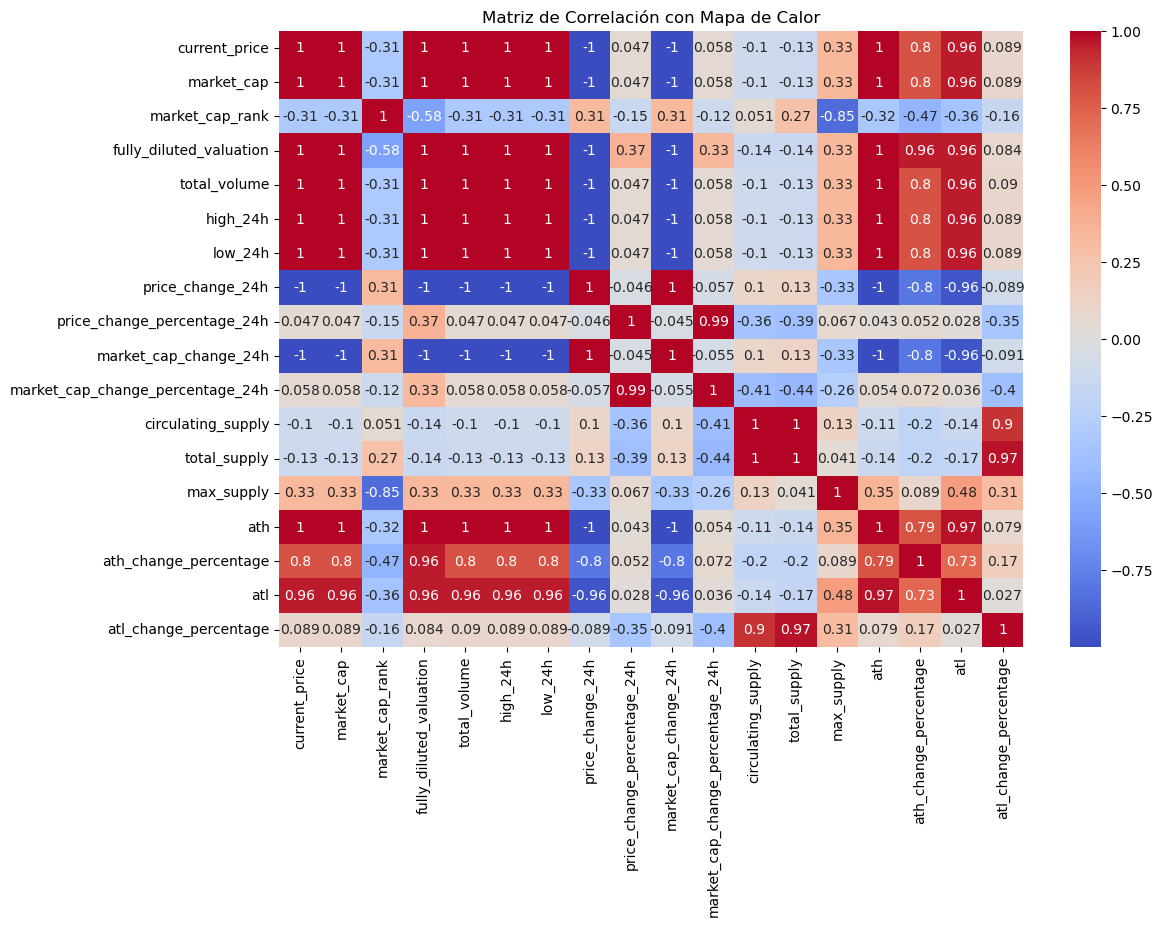

In [10]:
correlation_matrix = df_markets.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Matriz de Correlación con Mapa de Calor')
plt.show()

Las columnas que indican precios recientes tienen fuerte correlación entre sí. Hay también grupos de columnas relacionadas, por ejemplo (atl, ath, atl_change_percentage, ath_change_percentage) que existen para efectuar una comparación respecto al precio actual.

Respecto a este grupo nombrado (at - All Times), y comparando máximos y mínimos de todos los tiempos con el precio actual, notamos que **volatilidad de las monedas es muy notoria**. Si bien los valores actuales respecto a los máximos son entre un ~57 y un ~100% menores, tenemos aún mayor variedad de diferencias del precio actual respecto a los mínimos históricos. 

En otro grupo de columnas relacionadas entre sí, observé valores de las columnas que detallan supply (cantidad de unidades de la moneda) y noté varios valores faltantes. Busqué datos adicionales en CoinMarketCap:

In [11]:
metadata = get_metadata_v2(crypto_ids)

In [12]:
metadata

,id,name,symbol,category,description,slug,logo,subreddit,notice,tags,tag-names,tag-groups,urls,platform,date_added,twitter_username,is_hidden,date_launched,contract_address,self_reported_circulating_supply,self_reported_tags,self_reported_market_cap,infinite_supply
0,1,Bitcoin,BTC,coin,Bitcoin (BTC) is a cryptocurrency launched in ...,bitcoin,https://s2.coinmarketcap.com/static/img/coins/...,bitcoin,,"[mineable, pow, sha-256, store-of-value, state...","[Mineable, PoW, SHA-256, Store Of Value, State...","[OTHERS, ALGORITHM, ALGORITHM, CATEGORY, CATEG...","{'website': ['https://bitcoin.org/'], 'twitter...",None,2010-07-13T00:00:00.000Z,,0,2010-07-13T00:00:00.000Z,[],None,None,None,False
1,131,Dash,DASH,coin,Dash (DASH) is a cryptocurrency launched in 20...,dash,https://s2.coinmarketcap.com/static/img/coins/...,dashpay,,"[mineable, hybrid-pow-pos, x11, medium-of-exch...","[Mineable, Hybrid - PoW & PoS, X11, Medium of ...","[OTHERS, ALGORITHM, ALGORITHM, INDUSTRY, CATEG...","{'website': ['https://www.dash.org/', 'https:/...",None,2014-02-14T00:00:00.000Z,Dashpay,0,2014-01-18T00:00:00.000Z,[],None,None,None,False
2,328,Monero,XMR,coin,Monero (XMR) is a cryptocurrency . Users are a...,monero,https://s2.coinmarketcap.com/static/img/coins/...,monero,,"[mineable, pow, medium-of-exchange, privacy, r...","[Mineable, PoW, Medium of Exchange, Privacy, R...","[OTHERS, ALGORITHM, INDUSTRY, CATEGORY, CATEGO...","{'website': ['https://www.getmonero.org/'], 't...","{'id': '5604', 'name': 'Secret', 'slug': 'secr...",2014-05-21T00:00:00.000Z,monero,0,None,[{'contract_address': 'secret19ungtd2c7srftqdw...,None,None,None,True
3,693,Verge,XVG,coin,Verge (XVG) is a cryptocurrency . Users are ab...,verge,https://s2.coinmarketcap.com/static/img/coins/...,vergecurrency,We have received reports from the Verge team t...,"[mineable, multiple-algorithms, medium-of-exch...","[Mineable, Multiple algorithms, Medium of Exch...","[OTHERS, ALGORITHM, INDUSTRY, CATEGORY]","{'website': ['http://vergecurrency.com/'], 'tw...",None,2014-10-25T00:00:00.000Z,vergecurrency,0,None,[],None,None,None,False
4,1168,Decred,DCR,coin,Decred (DCR) is a cryptocurrency launched in 2...,decred,https://s2.coinmarketcap.com/static/img/coins/...,decred,,"[mineable, hybrid-pow-pos, blake256, medium-of...","[Mineable, Hybrid - PoW & PoS, BLAKE256, Mediu...","[OTHERS, ALGORITHM, ALGORITHM, INDUSTRY, CATEG...","{'website': ['https://decred.org/', 'https://p...",None,2016-02-10T00:00:00.000Z,decredproject,0,2016-02-08T00:00:00.000Z,[],None,"[Hybrid - PoW & PoS, BLAKE256, Medium of Excha...",None,False
5,1437,Zcash,ZEC,coin,Zcash (ZEC) is a cryptocurrency . Users are ab...,zcash,https://s2.coinmarketcap.com/static/img/coins/...,zec,,"[mineable, pow, equihash, medium-of-exchange, ...","[Mineable, PoW, Equihash, Medium of Exchange, ...","[OTHERS, ALGORITHM, ALGORITHM, INDUSTRY, CATEG...","{'website': ['https://z.cash/'], 'twitter': ['...","{'id': '1839', 'name': 'BNB', 'slug': 'bnb', '...",2016-10-29T00:00:00.000Z,electriccoinco,0,None,[{'contract_address': '0x1ba42e5193dfa8b03d15d...,None,None,None,False
6,1698,Horizen,ZEN,coin,Horizen (ZEN) is a cryptocurrency launched in ...,horizen,https://s2.coinmarketcap.com/static/img/coins/...,Horizen,,"[mineable, pow, medium-of-exchange, platform, ...","[Mineable, PoW, Medium of Exchange, Platform, ...","[OTHERS, ALGORITHM, INDUSTRY, CATEGORY, INDUST...","{'website': ['https://www.horizen.io/', 'https...",None,2017-06-01T00:00:00.000Z,horizenglobal,0,2017-05-31T00:00:00.000Z,[],None,"[DPoS, PoS, PoW, Equihash, Education, Medium o...",None,False
7,2665,Dero,DERO,coin,Dero (DERO) is a cryptocurrency . Users are ab...,dero,https://s2.coinmarketcap.com/static/img/coins/...,DeroProject,,"[mineable, privacy, smart-contracts]","[Mineable, Privacy, Smart Contracts]","[OTHERS, CATEGORY, CATEGORY]","{'website': ['https://dero.io'], 'twitter': ['...",None,2018-04-23T00:00:00.000Z,DeroProject,0,None,[],None,None,None,False
8,3709,Grin,GRIN,coin,Grin (GRIN) is a c

En este dataset también faltan los valores respecto al stock de monedas, no es posible reemplazar. La única novedad que observamos es que, para Monero y Secret, el valor de max_supply no aplica, ya que se indica en estos nuevos datos que, por principio de funcionamiento de estas monedas, es infinito.

## 3. El endpoint coins/{id} nos trae información más específica del estilo metadata.
<hr>

https://api.coingecko.com/api/v3/coins/{id}

Llamamos la función, que utiliza un bucle para llamar al endpoint con cada id que le pasamos en la lista de ids

In [13]:
df_coins = get_coins_id(crypto_ids)

In [14]:
df_coins

,id,symbol,name,asset_platform_id,platforms,detail_platforms,block_time_in_minutes,hashing_algorithm,categories,public_notice,additional_notices,localization,description,links,image,country_origin,genesis_date,sentiment_votes_up_percentage,sentiment_votes_down_percentage,watchlist_portfolio_users,market_cap_rank,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,market_data,community_data,developer_data,public_interest_stats,status_updates,last_updated,tickers,contract_address
0,bitcoin,btc,Bitcoin,None,{'': ''},"{'': {'decimal_place': None, 'contract_address...",10,SHA-256,"[Cryptocurrency, Layer 1 (L1)]",None,[],"{'en': 'Bitcoin', 'de': 'Bitcoin', 'es': 'Bitc...",{'en': 'Bitcoin is the first successful intern...,"{'homepage': ['http://www.bitcoin.org', '', ''...",{'thumb': 'https://assets.coingecko.com/coins/...,,2009-01-03,75.56,24.44,1328382,1,1,83.151,99.241,83.341,100.011,0.073,"{'current_price': {'aed': 107478, 'ars': 10240...","{'facebook_likes': None, 'twitter_followers': ...","{'forks': 35527, 'stars': 70869, 'subscribers'...","{'alexa_rank': 9440, 'bing_matches': None}",[],2023-08-15 17:14:41.706,"[{'base': 'BTC', 'target': 'TUSD', 'market': {...",NaN
1,dash,dash,Dash,None,{'': ''},"{'': {'decimal_place': None, 'contract_address...",2,X11,"[Alleged SEC Securities, Cryptocurrency, Maste...",None,[],"{'en': 'Dash', 'de': 'Dash', 'es': 'Dash', 'fr...",{'en': 'Dash (DASH) is digital cash designed t...,"{'homepage': ['https://www.dash.org', '', ''],...",{'thumb': 'https://assets.coingecko.com/coins/...,,2014-01-19,50.00,50.00,82389,106,39,51.994,65.377,43.398,55.664,0.010,"{'current_price': {'aed': 114.97, 'ars': 10954...","{'facebook_likes': None, 'twitter_followers': ...","{'forks': 26, 'stars': 37, 'subscribers': 13, ...","{'alexa_rank': 75926, 'bing_matches': None}",[{'description': 'Release Announcement: Dash P...,2023-08-15 17:14:23.105,"[{'base': 'DASH', 'target': 'USDT', 'market': ...",NaN
2,decred,dcr,Decred,None,{'': ''},"{'': {'decimal_place': None, 'contract_address...",5,Blake-256,"[Cryptocurrency, Governance, Privacy Coins]",None,[],"{'en': 'Decred', 'de': 'Decred', 'es': 'Decred...",{'en': 'Decred aims to build a community-direc...,"{'homepage': ['https://www.decred.org/', 'http...",{'thumb': 'https://assets.coingecko.com/coins/...,,2016-02-08,50.00,50.00,16457,152,67,48.677,77.359,37.138,31.911,0.002,"{'current_price': {'aed': 52.67, 'ars': 5017.9...","{'facebook_likes': None, 'twitter_followers': ...","{'forks': 289, 'stars': 701, 'subscribers': 77...","{'alexa_rank': 350460, 'bing_matches': None}","[{'description': 'Decred v1.7.0 ""Based Bison"" ...",2023-08-15 17:14:35.123,"[{'base': 'DCR', 'target': 'USDT', 'market': {...",NaN
3,dero,dero,Dero,None,{'': ''},"{'': {'decimal_place': None, 'contract_address...",0,AstroBWT,"[Smart Contract Platform, Privacy Coins]",None,[],"{'en': 'Dero', 'de': 'Dero', 'es': 'Dero', 'fr...","{'en': 'DERO is a general purpose, private and...","{'homepage': ['https://dero.io/', '', ''], 'bl...",{'thumb': 'https://assets.coingecko.com/coins/...,,2017-12-05,85.71,14.29,9746,443,482,27.963,22.596,30.536,11.724,0.003,"{'current_price': {'aed': 12.83, 'ars': 1222.3...","{'facebook_likes': None, 'twitter_followers': ...","{'forks': 15, 'stars': 49, 'subscribers': 17, ...","{'alexa_rank': 1060810, 'bing_matches': None}",[],2023-08-15 17:14:38.539,"[{'base': 'DERO', 'target': 'BTC', 'market': {...",NaN
4,grin,grin,Grin,None,{'': ''},"{'': {'decimal_place': None, 'contract_address...",1,Multiple Algorithms,"[Cryptocurrency, Privacy Coins]",None,[],"{'en': 'Grin', 'de': 'Grin', 'es': 'Grin', 'fr...",{'en': 'Grin coin is a private & lightweight o...,"{'homepage': ['https://grin.mw/', '', ''], 'bl...",{'thumb': 'https://assets.coingecko.com/coins/...,,2019-01-15,NaN,NaN,7965,1178,226,35.921,72.995,6.546,21.440,0.002,"{'current_price': {'aed': 0.13135, 'ars': 12.5...","{'facebook_likes': None, 'twitter_followers': ...","{'forks': 1016, '

Este set tiene varios campos de metadata similares a los que observamos con CoinMarketCap en el dataframe del punto anterior. Entre los aspectos más notables de este set, encontramos diversas columnas de rankings y scores, que nos van a ayudar a evaluar la confianza que generan las monedas, y construir eventualmente un KPI alrededor.

Exploramos algunos de los campos con valores anidados

* La columna de categorías

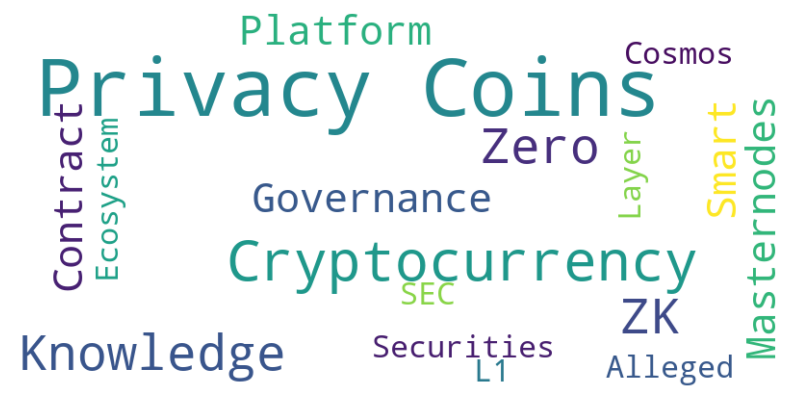

In [15]:
categories_array = np.array(df_coins['categories'].dropna())
flattened_categories = np.concatenate(categories_array)
all_categories = ' '.join(flattened_categories)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_categories)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


* Vamos a observar también la columna tag-names en el dataset de metadata de CoinMarketCap

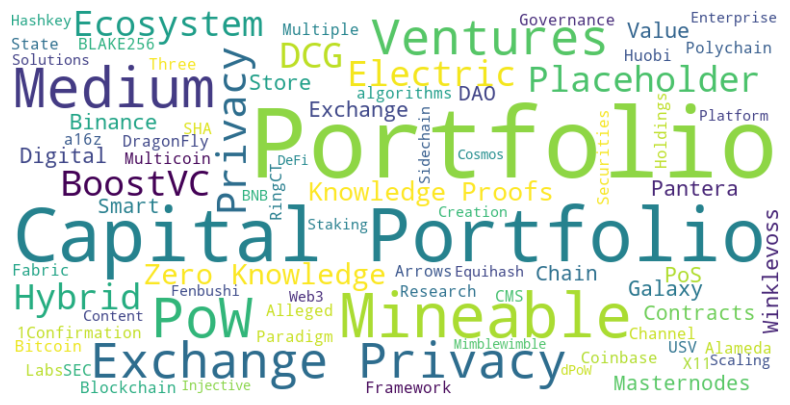

In [16]:
categories_array = np.array(metadata['tag-names'].dropna())
flattened_categories = np.concatenate(categories_array)
all_categories = ' '.join(flattened_categories)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_categories)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


* Las keys de market_data tienen muchas similitudes con las vistas en el endpoint anterior, y algunos datos históricos agregados

In [17]:

df_coins_market = pd.json_normalize(df_coins['market_data'])
df_coins_market


total_value_locked  mcap_to_tvl_ratio fdv_to_tvl_ratio   roi  \
0                  NaN                NaN             None  None   
1                  NaN                NaN             None  None   
2                  NaN                NaN             None  None   
3                  NaN                NaN             None  None   
4                  NaN                NaN             None  None   
5                  NaN                NaN             None  None   
6                  NaN                NaN             None  None   
7                  NaN                7.3                -  None   
8                  NaN                NaN             None  None   
9                  NaN                NaN             None  None   
10                 NaN                NaN             None  None   

    market_cap_rank  price_change_24h  price_change_percentage_24h  \
0                 1       -361.466218                     -1.22025   
1               106         -0.947202                     -2.93720   
2               152         -0.412643                     -2.79745   
3               443         -0.067538                     -1.89695   
4              1178         -0.002198                     -5.79027   
5                26         -2.387903                     -1.49618   
6               431         -0.003444                     -1.44535   
7               296          0.050397                     15.13627   
8               350         -0.000354                     -8.25635   
9               143         -0.408915                     -1.37091   
10              234         -0.437403                     -4.98531   

    price_change_percentage_7d  price_change_percentage_14d  \
0                     -1.58524                      1.23430   
1                     -5.56352                      0.14842   
2                     -1.79383                      0.39446   
3                    -13.65554                    -14.30125   
4                     -5.67958                     13.76139   
5                     -1.28495                     -0.56104   
6                     13.12403                     13.36795   
7                     14.26767                     18.71343   
8                     -7.44398                    -21.52977   
9                     -0.87470                     -1.74855   
10                    -5.31906                    -11.32617   

    price_change_percentage_30d  price_change_percentage_60d  \
0                      -3.70007                     12.83315   
1                      -7.49155                      2.80534   
2                      -3.52472                      1.43114   
3                     -19.63166                    -28.67410   
4                     -12.80666                     12.46522   
5                      -4.40447                     16.75998   
6                      26.67753                     11.07277   
7                      -0.61960                     27.49065   
8                     -34.76668                    173.40147   
9                      -5.56752                     20.15196   
10                      2.43244                     33.07035   

    price_change_percentage_200d  price_change_percentage_1y  \
0                       26.45452                    20.72508   
1                      -38.77264                   -41.91373   
2                      -38.99802                   -56.58385   
3                      -28.33039                   -12.84843   
4                      -46.98177                   -46.24858   
5                      -10.78273                    -5.21225   
6                      -45.28634                   -54.01892   
7                      -51.91155                   -71.78732   
8                       29.07124                    -1.65878   
9                      -36.31350                   -60.51343   
10                     -21.67202                   -58.89774   

    market_cap_change_24h  market_cap_change_percen

* Descripción de la moneda, elegimos en campo en idioma inglés para observar el ejemplo

In [22]:
pprint(df_coins['description'][0].get('en'))

('Bitcoin is the first successful internet money based on peer-to-peer '
 'technology; whereby no central bank or authority is involved in the '
 'transaction and production of the Bitcoin currency. It was created by an '
 'anonymous individual/group under the name, Satoshi Nakamoto. The source code '
 'is available publicly as an open source project, anybody can look at it and '
 'be part of the developmental process.\r\n'
 '\r\n'
 'Bitcoin is changing the way we see money as we speak. The idea was to '
 'produce a means of exchange, independent of any central authority, that '
 'could be transferred electronically in a secure, verifiable and immutable '
 'way. It is a decentralized peer-to-peer internet currency making mobile '
 'payment easy, very low transaction fees, protects your identity, and it '
 'works anywhere all the time with no central authority and banks.\r\n'
 '\r\n'
 'Bitcoin is designed to have only 21 million BTC ever created, thus making it '
 'a deflationary curren

* Detalle de plataformas, única entrada con datos. Muestra el contrato actual de la moneda Secret en la blockchain.

In [19]:
df_coins['detail_platforms'][7]

{'secret': {'decimal_place': 6,
  'contract_address': 'secret1k0jntykt7e4g3y88ltc60czgjuqdy4c9e8fzek'}}

* Actividad en GitHub, nos puede contar una historia respecto a la actividad de desarrollo

In [23]:
pprint(df_coins['developer_data'][8])

{'closed_issues': 733,
 'code_additions_deletions_4_weeks': {'additions': 446, 'deletions': -444},
 'commit_count_4_weeks': 2,
 'forks': 402,
 'last_4_weeks_commit_activity_series': [0,
                                         0,
                                         0,
                                         0,
                                         0,
                                         0,
                                         0,
                                         0,
                                         0,
                                         0,
                                         0,
                                         0,
                                         0,
                                         0,
                                         0,
                                         0,
                                         0,
                                         0,
                                         2,
                      

Vamos a separar estos datos en un dataframe propio en el siguiente paso.

* La columna tickers nos brinda datos por broker que opera la moneda. Tomamos un solo valor como ejemplo.

In [21]:
df_coins['tickers'][0][0]

{'base': 'BTC',
 'target': 'TUSD',
 'market': {'name': 'Binance',
  'identifier': 'binance',
  'has_trading_incentive': False},
 'last': 29297.72,
 'volume': 56405.12352,
 'converted_last': {'btc': 0.9996472, 'eth': 15.923604, 'usd': 29246},
 'converted_volume': {'btc': 56595, 'eth': 901522, 'usd': 1655767838},
 'trust_score': 'green',
 'bid_ask_spread_percentage': 0.013651,
 'timestamp': '2023-08-15T17:13:16+00:00',
 'last_traded_at': '2023-08-15T17:13:16+00:00',
 'last_fetch_at': '2023-08-15T17:13:16+00:00',
 'is_anomaly': False,
 'is_stale': False,
 'trade_url': 'https://www.binance.com/en/trade/BTC_TUSD?ref=37754157',
 'token_info_url': None,
 'coin_id': 'bitcoin',
 'target_coin_id': 'true-usd'}

Esta columna tiene mucha información, vamos a llamar a la API que retorna esta columna por separado en una instancia posterior.

---
***Vamos a re trabajar la API call para descartar algunas columnas, y usar dataframes individuales para otras***

https://api.coingecko.com/api/v3/coins/{}?localization=false&tickers=false&market_data=false&community_data=false

Llamado al endpoint de coins usando la nueva función

In [ ]:
df_coins, df_developers = get_coins_id_filtered(crypto_ids)

Ahora tenemos un dataframe limpio con datos por moneda, con relación a su seguridad y confianza

In [ ]:
df_coins

El hashing algorithm es un importante indicativo de seguridad. El de Secret no está en este dataset, pero una búsqueda en su proyecto de GitHub indica que utiliza X11. Por simplicidad vamos a agregar este dato manualmente (no se encontró disponible en la versión abierta de CoinMarketCap ni Binance como llamada API)

In [ ]:
df_coins.loc[df_coins['id'] == 'secret', 'hashing_algorithm'] = 'X11'

In [ ]:
df_coins

In [ ]:
df_coins.describe()

El describe nos aporta una idea de la escala de cada medida, fundamental a la hora de compatibilizar uno con otro. Observemos al correlación:

In [ ]:
coins_corr = df_coins.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(coins_corr, annot=True, cmap='coolwarm', center=0)

plt.title('Matriz de Correlación con Mapa de Calor')
plt.show()

Hay columnas que son prácticamente equivalentes, como sentiments_votes_up vs sentiments_vote_down, liquidity_score vs coingecko_score (lo que sugiere que el score de coingecko está fuertemente influenciado por la liquidez); y también public_interest_score vs watchlist_porfolio_users (lo que sugiere que el score se basa fuertemente en la cantidad de usuarios que tienen la moneda en su watchlist).

Para complementarlo, tenemos un dataframe con datos de desarrollo en GitHub

In [ ]:
df_developers

In [ ]:
df_developers.describe()

Acá se nota la dispersión de datos dentro de una misma columna. Muy difíciles de graficar por cuestiones de escala, pero vamos a observar correlación:

In [ ]:
developers_corr = df_developers.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(developers_corr, annot=True, cmap='coolwarm', center=0)

plt.title('Matriz de Correlación con Mapa de Calor')
plt.show()

Fuertes relaciones en muchas de las columnas. La popularidad y número de participantes en el desarrollo muestra una relación muy directa con la actividad de desarrollo. El número de deletions está expresado en negativo, por lo que muestra una relación opuesta a la adiciones; cuando en realidad la relación es prácticamente 1 a 1.

## 4. Llamamos el endpoint de Tickers
<hr>

https://api.coingecko.com/api/v3/coins/{}/tickers

Ya habíamos visto un preview de las keys y valores posibles en el endpoint Coins

In [ ]:
tickers_dict = get_coins_tickers(crypto_ids)

La función retorna un diccionario con dataframes

In [ ]:
for key in tickers_dict:
    print(f"{key}: {tickers_dict[key].shape[0]}")

Éste es el número de filas, es decir, el número de mercados/brokers recopilados donde se opera la moneda.

Tomamos uno de los dataframes en el diccionario y lo observamos:

In [ ]:
tickers_dict['df_dash_ticker'].head(10)

El dato de último precio (columna last) es inconsistente a lo largo de la columna, ya que depende de la moneda en la columna target. Para observar con mayor consistencia, utilizamos las columnas que indican "converted", que están divididas en last y volume.

In [ ]:
ticker_dash_corr = tickers_dict['df_dash_ticker'].corr()

plt.figure(figsize=(12, 8))

sns.heatmap(ticker_dash_corr, annot=True, cmap='coolwarm', center=0)

plt.title('Matriz de Correlación con Mapa de Calor')
plt.show()

Las columnas de la categía "converted_last" son cuasi equivalentes entre sí, al igual que las columnas del conjunto "converted_volume" entre sí y repecto a "volume"; lo cual tiene completa lógica ya que esa es su función (mostrar equivalencia con diferentes unidades)

Eset dataset tiene un dato categórico muy interesante, el trust_score de cada broker. Ploteamos nube de palabras:

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(17, 12))
fig.subplots_adjust(hspace=1)  

graphic_dict = tickers_dict.copy()
del graphic_dict['df_bitcoin_ticker']

for idx, (key, df) in enumerate(graphic_dict.items()):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]

    text_data = ' '.join(df['trust_score'].astype(str))

    wordcloud = WordCloud(width=200, height=100, background_color='white').generate(text_data)

    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(key)
    ax.axis('off')

plt.tight_layout()
plt.show()

Observamos los valores únicos de cada dataset.

In [ ]:
# Exploramos los posibles valores de la columna trusts scores
for key in tickers_dict:
    unique_trust_scores = tickers_dict[key]['trust_score'].unique()
    print(f"Puntajes únicos en el dataframe {key}: {unique_trust_scores}")

Con esto obtenemos una idea de como escalarlo, en caso de utilizarse para el dashboard.

### 5. Llamamos el endpoint Market Chart para el máximo de días posible
---

https://api.coingecko.com/api/v3/coins/dash/market_chart?vs_currency=USD&days=max

In [ ]:
market_chart_dict = get_market_chart_max(crypto_ids)

In [ ]:
for key in market_chart_dict:
    print(f"El número de registros en el dataframe {key} es {market_chart_dict[key].shape[0]}")

Las monedas tienen diferente fecha de génesis, por lo cual el número de registros es completamente variable

In [ ]:
market_chart_dict['df_monero_max'].info()

Consultamos el endpoint de history para ver si podemos solucionar los NaNs


In [ ]:
# Separamos los registros y formateamos para la llamada el endpoint
filtered_rows = market_chart_dict['df_monero_max'][market_chart_dict['df_monero_max']['market_caps'].isna()]
dates = filtered_rows['date'].tolist()
formatted_dates = [date.strftime('%d-%m-%Y') for date in dates]
formatted_dates

In [ ]:
retrieved = []

# Llamamos el endpoint
for date in formatted_dates:
    retrieved.append(get_coin_history('monero', date))

retrieved

Con este método tampoco puede recuperarse el dato. CoinMarketsCap no ofrece dato similar en su plan gratuito.

In [ ]:
for df_name, df in market_chart_dict.items():
    na_rows_count = df.isna().any(axis=1).sum()
    print(f"El dataframe {df_name} tiene {na_rows_count} filas con uno o más NA/NaN, {round((na_rows_count / len(df)) * 100, 2)}% del dataset")

El problema no parece ser grave (ausencia de datos en 0% a 0.06%, según el dataset); podemos trabajar con los datos

Observamos el dataset de ejemplo

In [ ]:
market_chart_dict['df_monero_max'].describe()

Presenta la misma variabilidad de datos que otros datasets vistos anteriormente (volatilidad de cotizaciones de la moneda)

## 6. Datos de Open, High, Low, Close para la Moneda consultada
---

https://api.coingecko.com/api/v3/coins/{}/ohlc?vs_currency=USD&days={}

Llamamos al enpoint con la lista de monedas, sin especificar cantidad de días (retornará el máximo por moneda)

In [ ]:
ohlc_dictionary = get_OHLC(crypto_ids)

In [ ]:
for df in ohlc_dictionary:
    print(f" El dataframe {df} tiene {ohlc_dictionary[df].shape[0]} filas")

Exploramos Grin como ejemplo:

In [ ]:
ohlc_dictionary['df_grin_ohlc'].info()

In [ ]:
ohlc_dictionary['df_grin_ohlc'].head()

In [ ]:
ohlc_dictionary['df_grin_ohlc'].tail()

In [ ]:
sns.set(style='white')

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=ohlc_dictionary['df_grin_ohlc'], x='date', y='open', label='Open')
sns.lineplot(data=ohlc_dictionary['df_grin_ohlc'], x='date', y='high', label='High')
sns.lineplot(data=ohlc_dictionary['df_grin_ohlc'], x='date', y='low', label='Low')
sns.lineplot(data=ohlc_dictionary['df_grin_ohlc'], x='date', y='close', label='Close')

plt.title('Tendencia de precios')
plt.xlabel('Fecha')
plt.ylabel('Precios')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.boxplot(data=ohlc_dictionary['df_grin_ohlc'][['open', 'high', 'low', 'close']], notch=True)

plt.title('Boxplot de precios')
plt.xlabel('Tipo de Precio')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Esta es una de las monedas que habíamos notado con grandes diferencias entre los mínimos y máximos históricos. Es una de las más modernas, por lo que el valor de apertura en su primer día de cotización parace haber sido demasiado optimista para lo que luego fue la moneda. La superposición en la línea de tendencia nos habla de uniformidad a lo largo de cada día, para la mayoría de los mismos.

Los registros tienen 4 días de distancia (propio de la versión gratuita de CoinGecko)

In [ ]:
for df_name, df in ohlc_dictionary.items():
    na_rows_count = df.isna().any(axis=1).sum()
    print(f"El dataframe {df_name} tiene {na_rows_count} filas con uno o más NA/NaN, {round((na_rows_count / len(df)) * 100, 2)}% del dataset")

Todos los datos están completos